In [1]:
from reco_plugin.constants import *

def keVtoLambda(keV: float) -> float:
    E = keV * KEV_TO_JOULE              # en J
    wavelength_m = (PLANCK_J_S * LIGHT_SPEED) / E  # en m
    return wavelength_m

print(keVtoLambda(8))  # 1 keV to m

1.5498024804150033e-10


In [3]:
import tifffile as tiff
import numpy as np

sino = np.asarray(tiff.imread(r"C:\Users\clement.capdeville\Desktop\sinogram_cor_148.tif"))

In [4]:
from reco_plugin.processing.reconstruction import create_angles

angles = create_angles(sino)

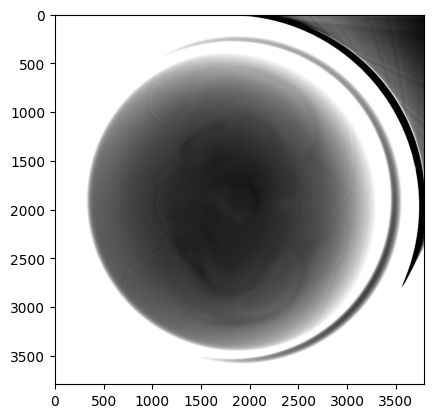

In [12]:
import astra
import matplotlib.pyplot as plt

# Définition des géométries de projection et du volume
proj_geom = astra.create_proj_geom('parallel', 1, sino.shape[1], angles)
vol_geom = astra.create_vol_geom(sino.shape[1], sino.shape[1])


# Création des objets de données pour le sinome et la reconstruction
sino_id = astra.data2d.create('-sino', proj_geom, sino)
rec_id = astra.data2d.create('-vol', vol_geom)
proj_id = astra.create_projector('cuda', proj_geom, vol_geom)

# Configuration et exécution de l'algorithme FBP_CUDA
cfg = astra.astra_dict('FBP_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sino_id

alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id)

# Récupération et retour de la reconstruction
reconstruction = astra.data2d.get(rec_id)

# Libération des ressources ASTRA
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sino_id)

plt.imshow(reconstruction, cmap='gray', vmin=0.00015, vmax=0.0003)

<Image layer 'FBP reconstruction' at 0x21f16b538f0>

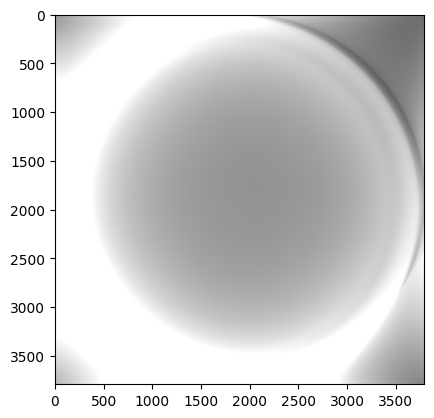

In [13]:
import astra
import matplotlib.pyplot as plt

# Définition des géométries de projection et du volume
proj_geom = astra.create_proj_geom('parallel', 1, sino.shape[1], angles)
vol_geom = astra.create_vol_geom(sino.shape[1], sino.shape[1])


# Création des objets de données pour le sinome et la reconstruction
sino_id = astra.data2d.create('-sino', proj_geom, sino)
rec_id = astra.data2d.create('-vol', vol_geom)
proj_id = astra.create_projector('cuda', proj_geom, vol_geom)

# Configuration et exécution de l'algorithme FBP_CUDA
cfg = astra.astra_dict('SIRT_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sino_id

alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id)

# Récupération et retour de la reconstruction
reconstruction = astra.data2d.get(rec_id)

# Libération des ressources ASTRA
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sino_id)

plt.imshow(reconstruction, cmap='gray', vmin=0.00015, vmax=0.0003)

import napari
viewer = napari.Viewer()
viewer.add_image(reconstruction, name='FBP reconstruction')

<Image layer 'FBP reconstruction' at 0x21f4b737110>

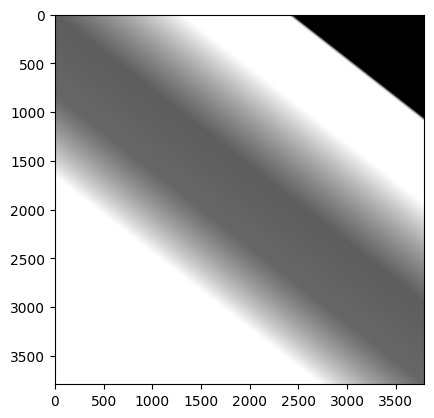

In [14]:
import astra
import matplotlib.pyplot as plt

# Définition des géométries de projection et du volume
proj_geom = astra.create_proj_geom('parallel', 1, sino.shape[1], angles)
vol_geom = astra.create_vol_geom(sino.shape[1], sino.shape[1])


# Création des objets de données pour le sinome et la reconstruction
sino_id = astra.data2d.create('-sino', proj_geom, sino)
rec_id = astra.data2d.create('-vol', vol_geom)
proj_id = astra.create_projector('cuda', proj_geom, vol_geom)

# Configuration et exécution de l'algorithme FBP_CUDA
cfg = astra.astra_dict('SART_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sino_id

alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id)

# Récupération et retour de la reconstruction
reconstruction = astra.data2d.get(rec_id)

# Libération des ressources ASTRA
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sino_id)

plt.imshow(reconstruction, cmap='gray', vmin=0.00015, vmax=0.0003)

import napari
viewer = napari.Viewer()
viewer.add_image(reconstruction, name='FBP reconstruction')

<Image layer 'FBP reconstruction' at 0x21f558ed9a0>

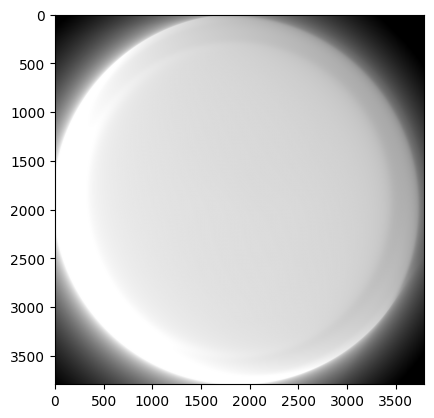

In [15]:
import astra
import matplotlib.pyplot as plt

# Définition des géométries de projection et du volume
proj_geom = astra.create_proj_geom('parallel', 1, sino.shape[1], angles)
vol_geom = astra.create_vol_geom(sino.shape[1], sino.shape[1])


# Création des objets de données pour le sinome et la reconstruction
sino_id = astra.data2d.create('-sino', proj_geom, sino)
rec_id = astra.data2d.create('-vol', vol_geom)
proj_id = astra.create_projector('cuda', proj_geom, vol_geom)

# Configuration et exécution de l'algorithme FBP_CUDA
cfg = astra.astra_dict('CGLS_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sino_id

alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id)

# Récupération et retour de la reconstruction
reconstruction = astra.data2d.get(rec_id)

# Libération des ressources ASTRA
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sino_id)

plt.imshow(reconstruction, cmap='gray', vmin=0.00015, vmax=0.0003)

import napari
viewer = napari.Viewer()
viewer.add_image(reconstruction, name='FBP reconstruction')

<Image layer 'FBP reconstruction' at 0x21f558f68d0>

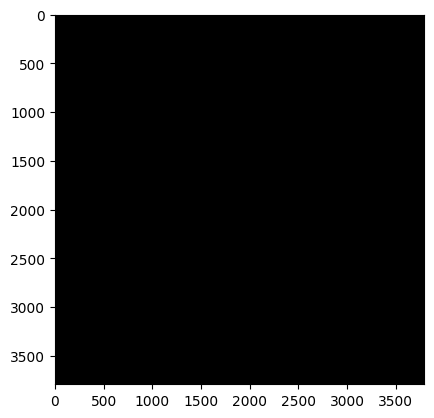

In [17]:
import astra
import matplotlib.pyplot as plt

# Définition des géométries de projection et du volume
proj_geom = astra.create_proj_geom('parallel', 1, sino.shape[1], angles)
vol_geom = astra.create_vol_geom(sino.shape[1], sino.shape[1])


# Création des objets de données pour le sinome et la reconstruction
sino_id = astra.data2d.create('-sino', proj_geom, sino)
rec_id = astra.data2d.create('-vol', vol_geom)
proj_id = astra.create_projector('cuda', proj_geom, vol_geom)

# Configuration et exécution de l'algorithme FBP_CUDA
cfg = astra.astra_dict('EM_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sino_id

alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id, 15)

# Récupération et retour de la reconstruction
reconstruction = astra.data2d.get(rec_id)

# Libération des ressources ASTRA
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sino_id)

plt.imshow(reconstruction, cmap='gray', vmin=0.00015, vmax=0.0003)

import napari
viewer = napari.Viewer()
viewer.add_image(reconstruction, name='FBP reconstruction')

In [ ]:
import tifffile as tiff
import numpy as np
import cupy as cp
import napari

projs = np.load(r"C:\Users\clement.capdeville\Documents\Napari\Reconstruction\test.npy")
proj = cp.asarray(projs[0])

viewer = napari.Viewer()
viewer.add_image(projs, name='Projs')

<Image layer 'Projs' at 0x21b3d82ec90>

Selection of slices and dimensions for each dataset.
Files processing : D:/SOLEIL0125/014_xlh_2/014_xlh_2/014_xlh_2.nxs


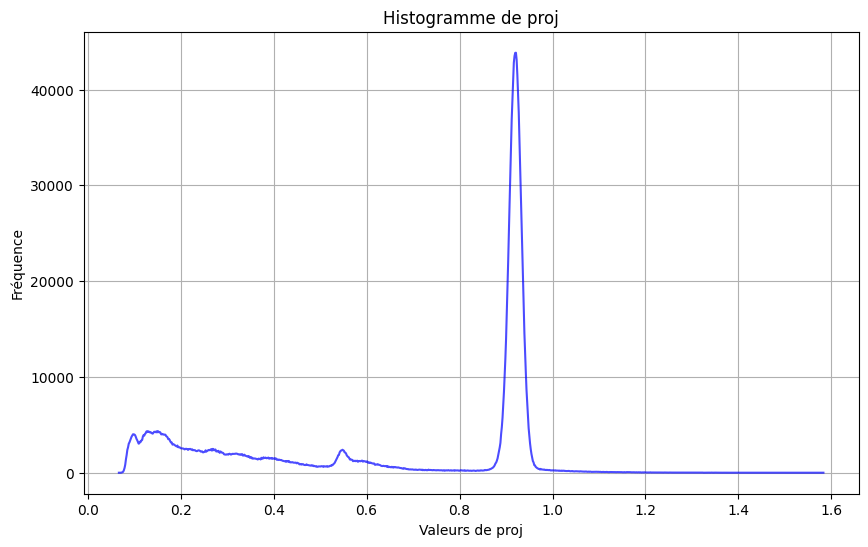

In [13]:
### Tracer l'histogramme de proj

import matplotlib.pyplot as plt

hist, bin_edges = np.histogram(proj.get(), bins=1000)  # Convert proj to NumPy array
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, color='blue', alpha=0.7)
plt.title('Histogramme de proj')
plt.xlabel('Valeurs de proj')
plt.ylabel('Fréquence')
plt.grid()
plt.show()

In [4]:
### Lire les metadata d'un nxs

import h5py
import numpy as np

path = r"D:\SOLEIL0125\010_wholehead_9M_2\010_wholehead_9M_2\010_wholehead_9M_2.nxs"

with h5py.File(path, 'r') as f:
    # Afficher les noms des groupes et des datasets
    print("Noms des groupes et des datasets :")
    def printname(name):
        print(name)
    f.visit(printname)

    # Accéder à un dataset spécifique
    # Dynamically explore the file structure to find the correct dataset path
    if 'entry1' in f:
        dataset = f['entry1']['data']['projs']
    else:
        print("The key 'entry1' does not exist. Available keys are:")
        print(list(f.keys()))
        dataset = None
    if dataset is not None:
        data = np.array(dataset)  # Convertir en tableau NumPy

        # Afficher les métadonnées
        print("\nMétadonnées :")
        for key, value in dataset.attrs.items():
            print(f"{key}: {value}")
    else:
        print("\nDataset is None. Please check the file structure and dataset path.")
        data = None

Noms des groupes et des datasets :
flyscan_0001
flyscan_0001/ANATOMIX
flyscan_0001/ANATOMIX/ans-c13-ei-l-u18.atx
flyscan_0001/ANATOMIX/ans-c13-ei-l-u18.atx/controller_record
flyscan_0001/ANATOMIX/ans-c13-ei-l-u18.atx/gap
flyscan_0001/ANATOMIX/ans-c13-ei-l-u18.atx/gap_velocity
flyscan_0001/ANATOMIX/ans-ca-machinestatus
flyscan_0001/ANATOMIX/ans-ca-machinestatus/current
flyscan_0001/ANATOMIX/ans-ca-machinestatus/function_mode
flyscan_0001/ANATOMIX/ans-ca-machinestatus/life_time
flyscan_0001/ANATOMIX/ans-ca-machinestatus/name
flyscan_0001/ANATOMIX/ans-ca-machinestatus/probe
flyscan_0001/ANATOMIX/ans-ca-machinestatus/type
flyscan_0001/ANATOMIX/i13-lt-c01-ex-fent_h
flyscan_0001/ANATOMIX/i13-lt-c01-ex-fent_h/device_name
flyscan_0001/ANATOMIX/i13-lt-c01-ex-fent_h/gap
flyscan_0001/ANATOMIX/i13-lt-c01-ex-fent_h/inside_up_position
flyscan_0001/ANATOMIX/i13-lt-c01-ex-fent_h/outside_down_position
flyscan_0001/ANATOMIX/i13-lt-c01-ex-fent_h/position
flyscan_0001/ANATOMIX/i13-lt-c01-ex-fent_h/positio

[0.08938233 0.09046185 0.09155138 ... 6.15502606 6.15610802 6.15719029]
[3.32795832e-06 1.12817787e-03 2.25302778e-03 ... 6.29578829e+00
 6.29691314e+00 6.29803799e+00]
(5600,)
0.06444915254237289 1.6824237869902948e-14 0.06444915254235184 0.06444915254240868


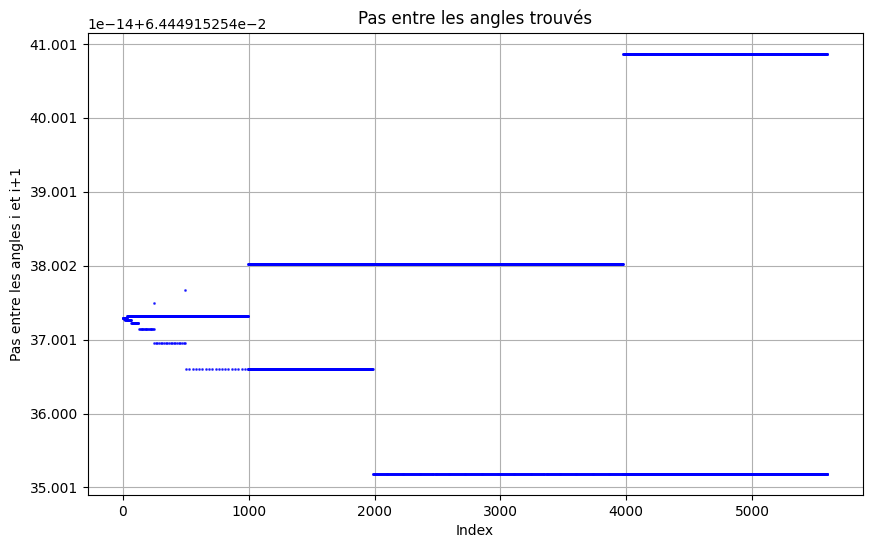

In [ ]:
import h5py
import numpy as np

path = r"D:\test\013_09B0960.nxs"

def find_angles_in_dataset(file, nz, group=None, path="", results=None, start_tol=10, end_tol=10):
    """
    Trouve tous les datasets 1D de longueur `nz`, commençant à ~0 et finissant à ~360.
    Retourne également les tableaux de valeurs correspondants.
    """
    if results is None:
        results = []

    if group is None:
        group = file

    for key in group:
        item = group[key]
        current_path = f"{path}/{key}"
        
        if isinstance(item, h5py.Group):
            find_angles_in_dataset(
                file, nz, group=item, path=current_path, results=results,
                start_tol=start_tol, end_tol=end_tol
            )
        elif isinstance(item, h5py.Dataset):
            if item.ndim == 1 and item.shape[0] == nz:
                try:
                    data = item[()]
                    if (
                        abs(data[0] - 0) <= start_tol and
                        abs(data[-1] - 360) <= end_tol
                    ):
                        results.append(data)
                except Exception as e:
                    print(f"Erreur lors de la lecture de {current_path} : {e}")
    return results

with h5py.File(path, "r") as f:
    resultats = find_angles_in_dataset(f, nz=5600)
    for data in resultats:
        print(np.radians(data))

truth = np.linspace(0, 360, 5600, endpoint=False)
print(data.shape)

import matplotlib.pyplot as plt

# plt.plot(data, label='Angles trouvés')
# plt.plot(truth, label='Angles de vérité')   

pas = []

for i in range(len(data)-1):
    pas.append(data[i+1] - data[i])

plt.figure(figsize=(10, 6))
plt.plot(np.array(pas), label='Pas entre les angles trouvés', color='blue', alpha=0.7, linewidth=0, marker='o', markersize=1)
plt.title('Pas entre les angles trouvés')
plt.xlabel('Index')
plt.ylabel('Pas entre les angles i et i+1')
plt.grid()

print(np.mean(pas), np.std(pas), np.min(pas), np.max(pas))






In [23]:
import numpy as np
from tqdm import tqdm

tol = 1.0  # tolérance pour décider si c'est bien une paire "miroir"
data_mod = data % 360

used_indices = set()
pairs = []

for i in tqdm(range(len(data))):
    if i in used_indices:
        continue

    angle_i = data_mod[i]
    best_j = None
    best_diff = 360  # valeur initiale très grande

    for j in range(len(data)):
        if i == j or j in used_indices:
            continue

        angle_j = data_mod[j]
        diff = abs((angle_i - angle_j) % 360 - 180)

        if diff < best_diff:
            best_j = j
            best_diff = diff

    if best_diff < tol:
        pairs.append((i, best_j))
        used_indices.add(i)
        used_indices.add(best_j)

print(f"{len(pairs)} paires miroir trouvées avec tolérance {tol}° :")
for i, j in pairs:
    print(f"data[{i}] = {data[i]:.2f}°, data[{j}] = {data[j]:.2f}°, diff = {(abs((data[i] - data[j]) % 360 - 180)):.2f}°")

print(len(data) // 2)


100%|██████████| 5600/5600 [00:05<00:00, 1001.83it/s]

2793 paires miroir trouvées avec tolérance 1.0° :
data[0] = 0.00°, data[2793] = 180.01°, diff = 0.01°
data[1] = 0.06°, data[2794] = 180.07°, diff = 0.01°
data[2] = 0.13°, data[2795] = 180.14°, diff = 0.01°
data[3] = 0.19°, data[2796] = 180.20°, diff = 0.01°
data[4] = 0.26°, data[2797] = 180.26°, diff = 0.01°
data[5] = 0.32°, data[2798] = 180.33°, diff = 0.01°
data[6] = 0.39°, data[2799] = 180.39°, diff = 0.01°
data[7] = 0.45°, data[2800] = 180.46°, diff = 0.01°
data[8] = 0.52°, data[2801] = 180.52°, diff = 0.01°
data[9] = 0.58°, data[2802] = 180.59°, diff = 0.01°
data[10] = 0.64°, data[2803] = 180.65°, diff = 0.01°
data[11] = 0.71°, data[2804] = 180.72°, diff = 0.01°
data[12] = 0.77°, data[2805] = 180.78°, diff = 0.01°
data[13] = 0.84°, data[2806] = 180.84°, diff = 0.01°
data[14] = 0.90°, data[2807] = 180.91°, diff = 0.01°
data[15] = 0.97°, data[2808] = 180.97°, diff = 0.01°
data[16] = 1.03°, data[2809] = 181.04°, diff = 0.01°
data[17] = 1.10°, data[2810] = 181.10°, diff = 0.01°
data[1

(3200,)


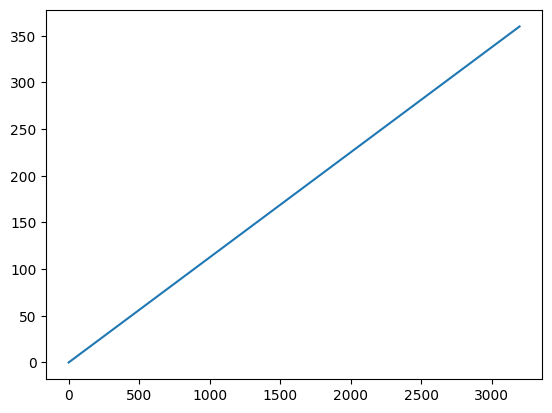

In [15]:
with h5py.File(path, 'r') as f:
    a = f['flyscan_0001']['scan_data']['tomo1Rz1'][()]  # Access the dataset's data

    print(a.shape)

import matplotlib.pyplot as plt

plt.plot(a)